### Error propagation

Wzory na podstawie: https://www.deeplearning.ai/deep-learning-specialization/ Neural Networks and Deep Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # biblioteka do wykresów
from mpl_toolkits.mplot3d import Axes3D # do wykresu 3D

from sklearn.datasets import make_classification # generacja danych, sklearn - bardzo przydatna biblioteka do uczenia maszynowego

Data generation

In [ ]:
m = 300
data = make_classification(n_samples=m, n_features=3, n_informative=3, n_redundant=0, n_classes=2, random_state=0)
#data = make_classification(n_samples=m, n_features=3, n_informative=3, n_redundant=0, n_classes=3, random_state=0)

In [ ]:
X = data[0]
Y = data[1]
#Y_to_graph = data[1]
#Y = np.zeros((300,3))
#for i in range(300):
#  Y[i][data[1][i]] = 1

In [ ]:
X.shape

(300, 3)

In [ ]:
Y.shape

(300,)

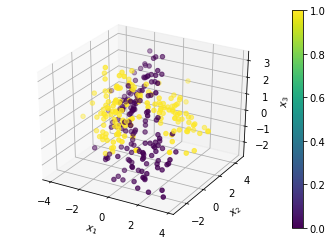

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#cax = ax.scatter(X[:,0], X[:,1], X[:,2], c=Y_to_graph.transpose())
cax = ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
fig.colorbar(cax)
plt.show()

Initializing weights

In [ ]:
np.random.seed(0)

In [ ]:
def initialize():
    # wartości W losujemy z rozkładu normalnego o średniej 0 i odchyleniu standardowym 0.1, wartości b ustawiamy na 0
    W1 = np.random.normal(0, 0.1, size=(4, 3))
    b1 = np.zeros(shape=(4, 1))
    W2 = np.random.normal(0, 0.1, size=(6, 4))
    b2 = np.zeros(shape=(6, 1))
    W3 = np.random.normal(0, 0.1, size=(1, 6))
    #b3 = np.zeros(shape=(3, 1))
    b3 = np.zeros(shape=(1, 1))
    return W1, b1, W2, b2, W3, b3

In [ ]:
W1, b1, W2, b2, W3, b3 = initialize()

In [ ]:
print('W1 = ', W1)
print('b1 = ', b1)
print('W2 = ', W2)
print('b2 = ', b2)
print('W3 = ', W3)
print('b3 = ', b3)

W1 =  [[ 0.17640523  0.04001572  0.0978738 ]
 [ 0.22408932  0.1867558  -0.09772779]
 [ 0.09500884 -0.01513572 -0.01032189]
 [ 0.04105985  0.01440436  0.14542735]]
b1 =  [[0.]
 [0.]
 [0.]
 [0.]]
W2 =  [[ 0.07610377  0.0121675   0.04438632  0.03336743]
 [ 0.14940791 -0.02051583  0.03130677 -0.08540957]
 [-0.25529898  0.06536186  0.08644362 -0.0742165 ]
 [ 0.22697546 -0.14543657  0.00457585 -0.01871839]
 [ 0.15327792  0.14693588  0.01549474  0.03781625]
 [-0.08877857 -0.19807965 -0.03479121  0.0156349 ]]
b2 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W3 =  [[ 0.12302907  0.12023798 -0.03873268 -0.03023028 -0.1048553  -0.14200179]]
b3 =  [[0.]]


Defining activation functions

In [ ]:
def sigmoid(Z):
    # sigmoidalna funkcja aktywacji dla macierzy Z
    return (1/(1+np.exp(-Z)))

def sigmoid_grad(Z):
    # pochodna funkcji sigmoid dla macierzy Z
    return sigmoid(Z)*(1-sigmoid(Z))

def leaky_relu(Z):
    # funkcja aktywacji leaky relu dla macierzy Z (leaky_relu(Z) = max(0.01 * Z, Z))
    return np.maximum(0.01*Z, Z)

def tanh(Z):
    # funkcja aktywacji tanh dla macierzy Z
    return np.tanh(Z)

def tanh_grad(Z):
    # pochodna funkcji tanh dla macierzy Z
    return 1 - np.power(np.tanh(Z),2)

def leaky_relu_grad(Z):
    # pochodna funkcji leaky relu dla macierzy Z
    # https://numpy.org/doc/stable/reference/generated/numpy.where.html
    return np.where(Z<0,0.01,1)

def softmax(vec):
    # funkcja softmax
    exponential = np.exp(vec)
    return exponential / np.sum(exponential)

In [ ]:
Xt = X.transpose()

In [ ]:
#Y = Y.reshape(3, m)
Y = Y.reshape(1, m)

In [ ]:
Y.shape

(1, 300)

Forward propagation

In [ ]:
def forward(X, W1, W2, W3, b1, b2, b3):
    Z1 = np.dot(W1, X) + b1
    A1 = leaky_relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = leaky_relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    Y_hat = A3
    return Z1, A1, Z2, A2, Z3, A3, Y_hat

In [ ]:
Z1, A1, Z2, A2, Z3, A3, Y_hat = forward(Xt, W1, W2, W3, b1, b2, b3)

In [ ]:
np.shape(Y_hat)

(1, 300)

In [ ]:
np.shape(Y_hat)

(1, 300)

Cost function

In [ ]:
def J(Y, Y_hat, m):
    # Categorical crossentropy
    #  return -np.mean(Y*np.log(Y_hat))

    # binarna entropia krzyżowa
    return np.mean(-(Y*np.log(Y_hat)+((1-Y)*np.log(1-Y_hat))))

Defining derivatives using backward propagation of errors

In [ ]:
def calculate_gradients(Y, A3, A2, A1, Z1, Z2, W3, W2, W1, b3, b2, b1, X, m):
    dZ3 = A3 - Y
    dW3 = (1/m)*np.dot(dZ3,A2.transpose())
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)
    dZ2 = (np.dot(W3.transpose(),dZ3))*leaky_relu_grad(Z2)
    dW2 = (1/m)*np.dot(dZ2,A1.transpose())
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = (np.dot(W2.transpose(),dZ2))*leaky_relu_grad(Z1)
    dW1 = np.dot(dZ1,X.transpose())
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    return dW3, db3, dW2, db2, dW1, db1

In [ ]:
dW3, db3, dW2, db2, dW1, db1 = calculate_gradients(Y, A3, A2, A1, Z1, Z2, W3, W2, W1, b3, b2, b1, Xt, m)

Gradient

In [ ]:
def update(W3, W2, W1, b3, b2, b1, dW3, dW2, dW1, db3, db2, db1, alpha=0.001):
    W3 = W3 - alpha * dW3
    W2 = W2 - alpha * dW2
    W1 = W1 - alpha * dW1
    b3 = b3 - alpha * db3
    b2 = b2 - alpha * db2
    b1 = b1 - alpha * db1
    return W3, W2, W1, b3, b2, b1

In [ ]:
W3, W2, W1, b3, b2, b1 = update(W3, W2, W1, b3, b2, b1, dW3, dW2, dW1, db3, db2, db1, alpha=0.001)

Accuracy

In [ ]:
def accuracy(Y, Y_hat):
    #for y in Y_hat:
    #  y = np.where(y == np.amax(y),1,0)
    #lst = [x==y for x in Y for y in Y_hat]
    #return (np.sum(lst)/np.size(Y))*100
    Y_hat_normalized = np.where(Y_hat>0.5,1,0)
    lst = [x==y for x in Y for y in Y_hat_normalized]
    return (np.sum(lst)/np.size(Y))*100

Teaching the model

In [ ]:
# inicjalizacja wag
W1, b1, W2, b2, W3, b3 = initialize()
# lista do zapisu wartości funkcji kosztu w kolejnych krokach uczenia (na początku pusta)
J_history = []
# lista do zapisu dokładności w kolejnych krokach (na początku pusta)
acc_history =[]
for i in range(100000):
    Z1, A1, Z2, A2, Z3, A3, Y_hat = forward(Xt, W1, W2, W3, b1, b2, b3)
    J_history.append(J(Y, Y_hat, m))
    acc_history.append(accuracy(Y, Y_hat))
    dW3, db3, dW2, db2, dW1, db1 = calculate_gradients(Y, A3, A2, A1, Z1, Z2, W3, W2, W1, b3, b2, b1, Xt, m)
    W3, W2, W1, b3, b2, b1 = update(W3, W2, W1, b3, b2, b1, dW3, dW2, dW1, db3, db2, db1, alpha=0.001)

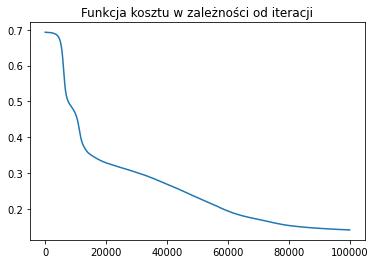

In [ ]:
plt.plot(J_history)
plt.title('Funkcja kosztu w zależności od iteracji')
plt.show()

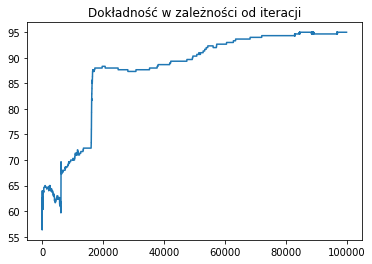

In [ ]:
plt.plot(acc_history)
plt.title('Dokładność w zależności od iteracji')
plt.show()

In [ ]:
# dokładność na koniec
acc_history[-1]

95.0

Prediction for new data

In [ ]:
# punkt do sprawdzenia
x_test1 = np.array([[3, 3, 0]])

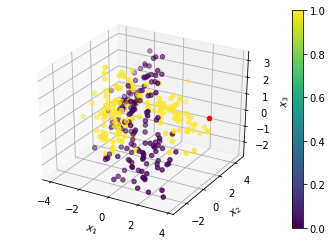

In [ ]:
# nowy punkt zaznaczony czerwoną kropką
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(X[:,0], X[:,1], X[:,2], c=Y.reshape(m,))
ax.scatter(x_test1[0][0], x_test1[0][1], x_test1[0][2], c='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
fig.colorbar(cax)
plt.show()

In [ ]:
# predykacja bliska 1 oznacza żółtą kropkę, bliska 0 fioletową kropkę
Z1, A1, Z2, A2, Z3, A3, Y_hat = forward(x_test1.transpose(), W1, W2, W3, b1, b2, b3)
print(Y_hat)

[[0.92441536]]
